# Table of Contents
* [What sells a car?](#chapter1)
    * [Initialization](#section_1_1)
        * [Load data](#sub_section_1_1_1)
        * [Explore initial data](#sub_section_1_1_2)
        * [Conclusion and further steps](#sub_section_1_1_3)
    * [Treating missing values](#section_1_2)
    * [Fix data types](#section_1_3)
    * [Enrich data](#section_1_4)
    * [check clean data](#section_1_5)
    * [Study core parameters](#section_1_6)
    * [Study and treat outliers](#section_1_7)
    * [Study core parameters without outliers](#section_1_8)
    * [Ads lifetime](#section_1_9)
    * [Average price per each type of vehicle](#section_1_10)
    * [Price factors](#section_1_11)
    * [General conclusion](#section_1_12)

# What sells a car? <a class="anchor" id="chapter1"></a>

Hundreds of free advertisements for vehicles are published on our site every day. The purpose of this analysis is to study which factors influence the price of a vehicle.

We would begin by loading the data and exploring it. This would be to check if we have any descrepancies with the data in terms of missing values, duplicates as well as data types that have been stored incorrectly. If we find any of these, we would clean up the data and correct them.

We would then proceed to study the core parameters that we feel would impact the price of a vehicle and determine which of those affects the price.

## Initialization <a class="anchor" id="section_1_1"></a>

We will first start by loading in the libraries that will be needed for this study.

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Load data <a class="anchor" id="sub_section_1_1_1"></a>

We will now load in the data.

In [2]:
# Load the data file into a DataFrame
vehicles_data = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data <a class="anchor" id="sub_section_1_1_2"></a>

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

To understanding the fields, we are going to explore them to make ourselves familiar with the data.

In [3]:
# print the general/summary information about the DataFrame
vehicles_data.info()
vehicles_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [4]:
# print a sample of data

vehicles_data.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
11305,23995,2015.0,toyota tundra,excellent,8.0,gas,60203.0,other,truck,white,1.0,2018-08-10,22
43982,39900,2016.0,chevrolet silverado 2500hd,like new,8.0,diesel,31125.0,automatic,truck,NaN,NaN,2018-11-27,19
26730,3600,NaN,chrysler town & country,good,6.0,gas,NaN,automatic,mini-van,silver,NaN,2019-04-05,57
9547,7500,2007.0,toyota highlander,new,6.0,gas,172000.0,automatic,SUV,silver,NaN,2018-11-16,30
25997,9200,2004.0,toyota tacoma,good,6.0,gas,319000.0,automatic,pickup,red,1.0,2019-04-19,65
16494,16999,2012.0,ram 1500,excellent,8.0,gas,106610.0,automatic,pickup,black,NaN,2019-03-12,1
39935,9500,2011.0,chevrolet silverado,good,8.0,gas,NaN,automatic,truck,silver,NaN,2018-08-29,6
9917,37995,2018.0,ram 2500,excellent,6.0,diesel,46008.0,automatic,pickup,white,1.0,2018-09-15,17
41373,8200,2017.0,volkswagen jetta,excellent,4.0,gas,NaN,automatic,sedan,NaN,NaN,2019-04-05,31
115,21900,2018.0,nissan frontier crew cab sv,good,6.0,gas,27576.0,other,pickup,NaN,1.0,2018-11-22,58


We will check for duplicates in the `model` column in order to prevent redundant data

In [5]:
#checking for obvious duplicates in the model column
vehicles_data.duplicated().sum()

0

We will now check to see if their are any implicit duplicate values.

In [6]:
#checking the unique values in the datab.
vehicles_data['model'].sort_values().unique()

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-250 super duty', 'ford f-350 sd', 'ford f150',
       'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty',
       'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus

In checking the data, the following were duplicated. We will correct these.'ford f-150' 'ford f-250' 'ford f-250 sd' 
'ford f-250 super duty' 'ford f-350 sd' 
'ford f150' 'ford f250' 'ford f250 super duty' 'ford f350 super duty' 'mercedes-benz benze sprinter 2500'
    
    

In [7]:
dict_replace = {'ford f-150' : 'ford f150',
                    'ford f-250' : 'ford f250',
                    'ford f-250 super duty' : 'ford f250 sd',
                    'ford f250 super duty' : 'ford f250 sd',
                    'ford f-250 sd' : 'ford f250 sd',
                    'ford f-350 sd' : 'ford f350 sd',
                    'ford f350 super duty' : 'ford f350 sd',
                    'mercedes-benz benze sprinter 2500' : 'mercedes-benz sprinter 2500'}
vehicles_data['model'].replace(dict_replace, inplace=True)

In [8]:
vehicles_data['model'].sort_values().unique()

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f150', 'ford f150 supercrew cab xlt',
       'ford f250', 'ford f250 sd', 'ford f350', 'ford f350 sd',
       'ford focus', 'ford focus se', 'ford fusion', 'ford fusion se',
       'ford mustang', 'ford mustang gt coupe 2d', 'ford ranger',
     

There are some missing values in the data that needs to be examined; `model_year`, `cylinders`,`odometer`,`paint_color` and `is_4wd` columns. `is_4wd` seems to have majority of the missing values of over 25000. The `model_year` column should be a date format however its saved as a float. The `date_posted` column is saved as an object but should also be in a date format.

### Conclusions and further steps <a class="anchor" id="sub_section_1_1_3"></a>

The vehicle_data has a total of 51525 rows and 12 columns. There are a few rows that need to be cleaned in terms of missing values,ie, `model_year`, `cylinders`,`odometer`,`paint_color` and `is_4wd`. In terms of outliers, we noticed that the price column may have alot of them off the bat, but we may need to study the rest to see if the other columns have outliers. The median is way lower than the mean by over 3000. The `date_posted` and `model_year` columns are saved as objects but should also be in date format. 

We may have to look into the missing values and determine if we would replace or remove them. Then we would transform all the wrong data type columns to their respective data types. We will then examine the data to remove the outliers that may be skewing the numbers. 

## Treat missing values <a class="anchor" id="section_1_2"></a>

Studying missing values for each column in more details and deciding what to do with them based on our conclusions.

In [9]:
#checking to see how many missing values are present in each row

vehicles_data.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

In [10]:
#checking to see the percentage of missing values per column

(100*vehicles_data.isna().sum()/vehicles_data.shape[0]).sort_values(ascending=False)

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

We would like to examine if the missing values have any dependencies with other columns.

In [11]:
#checking missing value columns with corresponding columns
missing_data_columns =['is_4wd','paint_color','odometer','cylinders','model_year']#list of all columns with missing values

for column in missing_data_columns:#displaying a table consisting of the other columns and each row of missing values
    print()#leaving a space right before the next table
    print(column)#print the column name before the table
    display(vehicles_data[vehicles_data[column].isna()])#prints the table of the column with the missing values and the other columns


is_4wd


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71



paint_color


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89



odometer


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89



cylinders


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28



model_year


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 sd,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [12]:
#checking the correlation of each row with eachother
vehicles_data.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,NaN,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,NaN,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,NaN,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,NaN,0.003804
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,-0.000682,-0.005703,0.005517,0.003804,NaN,1.000000


In [13]:
vehicles_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [14]:
#checking all the unique values in the column.
vehicles_data['is_4wd'].unique()

array([ 1., nan])

We will start with `is_4wd` column. We see that from the brief statistics from the describe method, `is_4wd` seems to have just 1 and NaN values.

The first obvious missing value fix is the `is_4wd` column. From the looks of things, the missing values represent the non-4wd cars. We would replace those with 0 to represent cars that are not 4 wheel drives. Later on, we would convert this column to a boolean value to represent True if it is a 4wd and False if not.

In [15]:
#converting all NaN values to 0
vehicles_data['is_4wd']=vehicles_data['is_4wd'].fillna(0)
vehicles_data['is_4wd'].unique()

array([1., 0.])

`model_year` column also has missing values. We would examine it closer to find out how to fix the missing values.

In [16]:
#findind the model year median to compare and determine whether to use mean or median
model_medians=vehicles_data.pivot_table(index='model',values='model_year',aggfunc='median')
model_medians

,model_year
model,
acura tl,2007.0
bmw x5,2010.0
buick enclave,2012.0
cadillac escalade,2009.0
chevrolet camaro,2013.0
...,...
toyota sienna,2008.0
toyota tacoma,2010.0
toyota tundra,2009.0


In [17]:
#finding the model year mean to compare and determine whether to use mean or median
model_means=vehicles_data.pivot_table(index='model',values='model_year',aggfunc='mean')
model_means

,model_year
model,
acura tl,2007.517857
bmw x5,2008.991870
buick enclave,2012.194553
cadillac escalade,2008.508475
chevrolet camaro,2008.397959
...,...
toyota sienna,2008.584416
toyota tacoma,2009.331599
toyota tundra,2009.350352


We would replace all the missing model_year values with the median year based on the model of the vehicle.

In [18]:
#filling the model_year values with the median per model
vehicles_data['model_year']=vehicles_data['model_year'].fillna(vehicles_data.groupby('model')['model_year'].transform('median'))
vehicles_data.isna().sum().sort_values(ascending=False)

paint_color     9267
odometer        7892
cylinders       5260
price              0
model_year         0
model              0
condition          0
fuel               0
transmission       0
type               0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [19]:
vehicles_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


We will now take a closer look at the odometer column

In [20]:
#finding the ododmeter mean and median to compare and see if we should use median or mean to fill in the missing values

mean_odometer=vehicles_data.pivot_table(index='model',values='odometer').reset_index()
median_odometer=vehicles_data.pivot_table(index='model',values='odometer',aggfunc=('median')).reset_index()

display(mean_odometer)
display(median_odometer)


,model,odometer
0,acura tl,142760.442786
1,bmw x5,113210.140351
2,buick enclave,113459.513274
3,cadillac escalade,123616.592453
4,chevrolet camaro,71067.983784
...,...,...
89,toyota sienna,136911.099644
90,toyota tacoma,126521.257426
91,toyota tundra,123271.181641
92,volkswagen jetta,107869.950783


,model,odometer
0,acura tl,141000.0
1,bmw x5,108500.0
2,buick enclave,113728.0
3,cadillac escalade,129176.0
4,chevrolet camaro,62655.5
...,...,...
89,toyota sienna,140715.0
90,toyota tacoma,125000.0
91,toyota tundra,120500.0
92,volkswagen jetta,107000.0


We would replace all the missing odometer values with the median odometer value.

In [21]:
#replacing the missing odometer values based on the vehicles condition
vehicles_data['odometer'].fillna(vehicles_data.groupby('condition')['odometer'].transform('median'),inplace=True)


In [22]:
vehicles_data.isna().sum().sort_values(ascending=False)

paint_color     9267
cylinders       5260
price              0
model_year         0
model              0
condition          0
fuel               0
odometer           0
transmission       0
type               0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [23]:
vehicles_data[vehicles_data['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [24]:
vehicles_data.isna().sum().sort_values(ascending=False)

paint_color     9267
cylinders       5260
price              0
model_year         0
model              0
condition          0
fuel               0
odometer           0
transmission       0
type               0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [25]:
#finding the cylinder mean and median to compare and see if we should use median or mean to fill in the missing values

mean_cylinders=vehicles_data.pivot_table(index='model',values='cylinders').reset_index()
median_cylinders=vehicles_data.pivot_table(index='model',values='cylinders',aggfunc=('median')).reset_index()

display(mean_cylinders)
display(median_cylinders)


,model,cylinders
0,acura tl,5.971564
1,bmw x5,6.406375
2,buick enclave,6.000000
3,cadillac escalade,7.986395
4,chevrolet camaro,6.887097
...,...,...
90,toyota sienna,5.952381
91,toyota tacoma,5.345205
92,toyota tundra,7.919561
93,volkswagen jetta,4.281116


,model,cylinders
0,acura tl,6.0
1,bmw x5,6.0
2,buick enclave,6.0
3,cadillac escalade,8.0
4,chevrolet camaro,6.0
...,...,...
90,toyota sienna,6.0
91,toyota tacoma,6.0
92,toyota tundra,8.0
93,volkswagen jetta,4.0


We will be replacing the missing cylinder values with the median.

In [26]:
#filling all missing cylinder values with the mean per model and then checking to see if it has reflcetd.
vehicles_data['cylinders'].fillna(vehicles_data.groupby('model')['cylinders'].transform('median'),inplace=True)
vehicles_data.isna().sum().sort_values(ascending=False)

paint_color     9267
price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

examining the paint color column

In [27]:
vehicles_data.query('paint_color.isna()')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f150,fair,8.0,gas,181613.0,automatic,pickup,NaN,0.0,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,0.0,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,0.0,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,0.0,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,104230.0,automatic,coupe,NaN,0.0,2018-11-24,89


In [28]:
vehicles_data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

We will fill all empty paint color with unknown

In [29]:
#fillinf the missing paint color values with unknown
vehicles_data['paint_color'].fillna('unknown',inplace=True)

In [30]:
vehicles_data.isna().sum().sort_values(ascending=False)

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

Now that all missing values are replaced, we will move on to fixing the data types that were wrongly recorded.

## Fix data types <a class="anchor" id="section_1_3"></a>

We have 3 rows that we would be fixing. Those are `model_year` to an integer,`cylinders` to integers,  `is_4wd` to boolean and `date_posted` to datetime.

In [31]:
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [32]:
#fixing model_year column to a datetime object
vehicles_data['model_year']= vehicles_data['model_year'].astype('int')
vehicles_data['model_year']

0        2011
1        2011
2        2013
3        2003
4        2017
         ... 
51520    2013
51521    2002
51522    2009
51523    2013
51524    2014
Name: model_year, Length: 51525, dtype: int64

In [33]:
#fixing the is_4wd column to a boolean

vehicles_data['is_4wd'] = vehicles_data['is_4wd'].where(vehicles_data['is_4wd'] == 1,False)

In [34]:
vehicles_data['is_4wd'] = vehicles_data['is_4wd'].where(vehicles_data['is_4wd'] == False,True)

In [35]:
#fixing the date_posted column
vehicles_data['date_posted'] = pd.to_datetime(vehicles_data['date_posted'],format='%Y-%m-%d')
vehicles_data['date_posted']

0       2018-06-23
1       2018-10-19
2       2019-02-07
3       2019-03-22
4       2019-04-02
           ...    
51520   2018-10-03
51521   2018-11-14
51522   2018-11-15
51523   2018-07-02
51524   2018-06-05
Name: date_posted, Length: 51525, dtype: datetime64[ns]

In [36]:
#fixing the cylinders column
vehicles_data['cylinders'] = vehicles_data['cylinders'].astype('int')
vehicles_data['cylinders']

0        6
1        6
2        4
3        8
4        4
        ..
51520    6
51521    4
51522    4
51523    4
51524    4
Name: cylinders, Length: 51525, dtype: int64

In [37]:
#checking data to see if the changes have reflected
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  object        
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 5.1+ MB


## Enrich data <a class="anchor" id="section_1_4"></a>

The `date_posted` column has been converted to a datetime object.
We will add additional factors to the data to make the analysis easier.

In [38]:
# Adding datetime values for when the ad was placed(date_posted)
vehicles_data.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
15860,18588,2008,ford f250 sd,excellent,8,diesel,124741.0,automatic,pickup,red,True,2018-06-09,36
43230,7995,2010,toyota prius,excellent,4,hybrid,140035.0,automatic,sedan,grey,False,2018-08-19,17
36869,8800,2014,ford taurus,excellent,4,gas,128752.0,automatic,sedan,grey,False,2018-09-26,79
7290,5500,2010,honda cr-v,excellent,4,gas,260000.0,automatic,SUV,brown,False,2018-11-20,27
39526,21990,2013,chevrolet silverado 3500hd,good,8,gas,99748.0,automatic,truck,white,False,2019-01-30,35
42054,7495,2015,nissan sentra,excellent,4,gas,27446.0,automatic,sedan,grey,False,2019-01-10,67
31975,17876,2009,jeep wrangler unlimited,excellent,6,gas,99075.0,automatic,wagon,black,True,2018-09-14,23
11474,11600,2013,volkswagen jetta,like new,4,diesel,60000.0,automatic,sedan,white,False,2018-11-27,20
39940,8000,2016,ford focus,excellent,4,gas,79687.0,automatic,sedan,grey,False,2018-05-13,96
33252,12497,2010,ford f150,excellent,8,gas,101291.0,automatic,pickup,grey,True,2018-10-29,75


The `date_posted` column is the datetime value for when the ad was placed.

In [39]:
#extracting the day from the date_posted column
vehicles_data['day_posted']=vehicles_data['date_posted'].dt.day

In [40]:
#extracting the month from the date_posted column
vehicles_data['month_posted']=vehicles_data['date_posted'].dt.month

In [41]:
#extracting the year from the date_posted column
vehicles_data['year_posted']=vehicles_data['date_posted'].dt.year

In [42]:
#checking the data for the added day month and year columns
vehicles_data[['date_posted','day_posted','month_posted','year_posted']]

,date_posted,day_posted,month_posted,year_posted
0,2018-06-23,23,6,2018
1,2018-10-19,19,10,2018
2,2019-02-07,7,2,2019
3,2019-03-22,22,3,2019
4,2019-04-02,2,4,2019
...,...,...,...,...
51520,2018-10-03,3,10,2018
51521,2018-11-14,14,11,2018
51522,2018-11-15,15,11,2018
51523,2018-07-02,2,7,2018


In [43]:
vehicles_data.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted
5411,3500,2007,nissan sentra,excellent,4,gas,123000.0,automatic,sedan,silver,False,2018-07-24,43,24,7,2018
44503,7000,2015,ford focus,excellent,4,gas,85000.0,automatic,sedan,unknown,False,2018-09-06,43,6,9,2018
122,4500,2012,chevrolet impala,excellent,6,gas,145000.0,automatic,sedan,white,False,2018-10-10,38,10,10,2018
18858,11000,2006,ford f150,excellent,8,gas,102000.0,automatic,truck,black,False,2018-07-14,43,14,7,2018
50942,11800,2005,jeep wrangler,like new,6,gas,163731.0,automatic,SUV,white,True,2018-10-13,85,13,10,2018
26021,24000,2018,chevrolet equinox,like new,4,diesel,8300.0,automatic,SUV,white,True,2019-02-20,61,20,2,2019
8927,6800,2007,ford f150,like new,8,gas,160800.0,automatic,truck,grey,True,2018-05-05,35,5,5,2018
26552,1,2018,ford edge,excellent,6,gas,27897.0,automatic,SUV,white,False,2018-08-16,20,16,8,2018
22790,17250,2016,ford f150,excellent,6,gas,36854.0,automatic,pickup,grey,False,2019-03-12,143,12,3,2019
3083,11500,2008,chevrolet silverado 1500,excellent,8,gas,115000.0,automatic,truck,grey,True,2018-10-01,78,1,10,2018


In [44]:
#calculating the age posted so that we can calculate the average mileage per year
vehicles_data['posted_age'] = vehicles_data['year_posted'] - vehicles_data['model_year']
vehicles_data['posted_age']

0         7
1         7
2         6
3        16
4         2
         ..
51520     5
51521    16
51522     9
51523     5
51524     4
Name: posted_age, Length: 51525, dtype: int64

In [45]:
# Add the vehicle's average mileage per year
vehicles_data['average_mileage'] = vehicles_data['odometer']/(vehicles_data['posted_age'])
vehicles_data['average_mileage'].sample(10)

39449    18428.571429
35394    22900.000000
46347    21500.000000
42618     4666.666667
36683    12266.166667
26755    13750.000000
2243     15104.692308
28443    10848.000000
46707    14800.000000
24352    13586.222222
Name: average_mileage, dtype: float64

In [46]:
# replacing the condition values with indexes for easy manipulation
display(vehicles_data['condition'].unique())#checking for all the unique values in the condition column 
                                            #  to determine what values to replace with indexing

dict_cond = {'new': 5, 'like new': 4,'excellent': 3,'good': 2,'fair': 1,'salvage': 0} #creating a dictionary for the indeces

vehicles_data['condition_index'] = vehicles_data['condition'].map(dict_cond)#mapping the dictionary with the condition
vehicles_data['condition_index']#viewing the new column and comparing it with the old column

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

0        2
1        2
2        4
3        1
4        3
        ..
51520    4
51521    0
51522    3
51523    2
51524    2
Name: condition_index, Length: 51525, dtype: int64

## Check clean data <a class="anchor" id="section_1_5"></a>

We will now check the data to ensure that it is clean enough to use for analysis.

In [47]:
# print the general/summary information about the DataFrame
vehicles_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  int64         
 2   model            51525 non-null  object        
 3   condition        51525 non-null  object        
 4   cylinders        51525 non-null  int64         
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  float64       
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  object        
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  day_posted       51525 non-null  int64         
 14  month_posted     51525 non-null  int64

In [48]:
vehicles_data.describe()

,price,model_year,cylinders,odometer,days_listed,day_posted,month_posted,year_posted,posted_age,average_mileage,condition_index
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,5.152300e+04,51525.000000
mean,12132.464920,2009.796448,6.121067,115199.014508,39.55476,15.449491,6.628491,2018.307462,8.511014,inf,2.637535
std,10040.803015,6.099229,1.657457,60484.863376,28.20427,8.736521,3.474134,0.461447,6.112979,NaN,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.00000,1.000000,1.000000,2018.000000,0.000000,0.000000e+00,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,19.00000,8.000000,3.000000,2018.000000,4.000000,1.058762e+04,2.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,33.00000,15.000000,7.000000,2018.000000,7.000000,1.527800e+04,3.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,53.00000,23.000000,10.000000,2019.000000,12.000000,2.287500e+04,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,31.000000,12.000000,2019.000000,110.000000,inf,5.000000


In [49]:
# print a sample of data
vehicles_data.sample(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,posted_age,average_mileage,condition_index
16559,17990,2013,ram 1500,excellent,8,gas,133100.0,automatic,pickup,unknown,True,2018-05-24,7,24,5,2018,5,26620.000000,3
31380,4500,2006,ford mustang,good,6,gas,165000.0,manual,coupe,black,False,2019-03-01,20,1,3,2019,13,12692.307692,2
42320,3900,2005,nissan altima,fair,4,gas,285089.0,automatic,sedan,unknown,False,2019-04-13,31,13,4,2019,14,20363.500000,1
11217,11900,2013,honda cr-v,excellent,4,gas,47121.0,automatic,SUV,silver,True,2019-01-10,104,10,1,2019,6,7853.500000,3
20412,24500,2014,jeep wrangler unlimited,like new,6,gas,72000.0,automatic,other,black,True,2018-12-19,22,19,12,2018,4,18000.000000,4
25786,6995,2011,acura tl,good,6,gas,181865.0,automatic,sedan,unknown,False,2018-07-23,47,23,7,2018,7,25980.714286,2
12803,10500,2005,ford f350 sd,good,8,diesel,187000.0,automatic,truck,blue,True,2018-05-22,24,22,5,2018,13,14384.615385,2
30582,9995,2014,toyota camry,excellent,4,gas,97649.0,automatic,sedan,red,False,2019-01-10,17,10,1,2019,5,19529.800000,3
7262,1900,2013,nissan sentra,fair,4,gas,255.0,automatic,sedan,black,False,2018-12-29,25,29,12,2018,5,51.000000,1
19847,7990,2007,ford mustang,like new,6,gas,130945.0,manual,coupe,black,False,2018-08-27,34,27,8,2018,11,11904.090909,4


There were some strange figures in the average mileage column. A mean of inf and standard deviation of NaN. We need to investigate this further.

In [50]:
#checking the maximum average mileage.

vehicles_data['average_mileage'].max()

inf

In [51]:
#checking all average mileage rows that have inf as their values

vehicles_data.loc[vehicles_data['average_mileage']==vehicles_data['average_mileage'].max()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,posted_age,average_mileage,condition_index
19,13990,2018,hyundai elantra,excellent,4,gas,31932.0,automatic,sedan,red,False,2018-08-25,27,25,8,2018,0,inf,3
71,23300,2018,nissan frontier crew cab sv,good,6,gas,27493.0,other,pickup,unknown,True,2018-10-13,36,13,10,2018,0,inf,2
78,23800,2019,nissan frontier crew cab sv,good,6,gas,10899.0,other,pickup,silver,True,2019-02-28,30,28,2,2019,0,inf,2
99,39950,2018,chevrolet silverado,excellent,8,gas,18500.0,automatic,truck,unknown,True,2018-08-05,16,5,8,2018,0,inf,3
106,21500,2019,nissan frontier crew cab sv,good,6,gas,16168.0,other,pickup,white,False,2019-03-29,70,29,3,2019,0,inf,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51376,27890,2018,ram 1500,excellent,8,gas,9446.0,automatic,truck,unknown,True,2018-05-06,39,6,5,2018,0,inf,3
51442,28990,2018,ford f150,excellent,8,gas,10152.0,automatic,truck,white,True,2018-06-13,47,13,6,2018,0,inf,3
51446,15999,2018,chevrolet malibu,excellent,4,gas,50502.0,automatic,sedan,black,False,2018-07-28,8,28,7,2018,0,inf,3
51447,33990,2019,ram 1500,excellent,8,gas,9000.0,automatic,truck,white,True,2019-01-25,36,25,1,2019,0,inf,3


The `posted_age` column for all inf average mileages are 0. Meaning the model year is the same as the date it was posted. The average mileage should be equal to the mileage. We would need to edit the formula to account for these dates.

In [52]:
def yearly_mileage(row):#returns the average mileage yearly for posted age > 0 and odometer for days = 0
    value_one = row['posted_age']
    value_two = row['odometer']
    if value_one == 0:#checks to see if the row is 0 or not
        return value_two
    else:
        return (value_two/value_one)


In [53]:
#applying the fucntion to the average mileage row
vehicles_data['average_mileage'] = vehicles_data[['odometer','posted_age']].apply(yearly_mileage,axis=1)

In [54]:
#checjing to see if the function worked
vehicles_data[vehicles_data['posted_age'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,posted_age,average_mileage,condition_index
19,13990,2018,hyundai elantra,excellent,4,gas,31932.0,automatic,sedan,red,False,2018-08-25,27,25,8,2018,0,31932.0,3
71,23300,2018,nissan frontier crew cab sv,good,6,gas,27493.0,other,pickup,unknown,True,2018-10-13,36,13,10,2018,0,27493.0,2
78,23800,2019,nissan frontier crew cab sv,good,6,gas,10899.0,other,pickup,silver,True,2019-02-28,30,28,2,2019,0,10899.0,2
99,39950,2018,chevrolet silverado,excellent,8,gas,18500.0,automatic,truck,unknown,True,2018-08-05,16,5,8,2018,0,18500.0,3
106,21500,2019,nissan frontier crew cab sv,good,6,gas,16168.0,other,pickup,white,False,2019-03-29,70,29,3,2019,0,16168.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51376,27890,2018,ram 1500,excellent,8,gas,9446.0,automatic,truck,unknown,True,2018-05-06,39,6,5,2018,0,9446.0,3
51442,28990,2018,ford f150,excellent,8,gas,10152.0,automatic,truck,white,True,2018-06-13,47,13,6,2018,0,10152.0,3
51446,15999,2018,chevrolet malibu,excellent,4,gas,50502.0,automatic,sedan,black,False,2018-07-28,8,28,7,2018,0,50502.0,3
51447,33990,2019,ram 1500,excellent,8,gas,9000.0,automatic,truck,white,True,2019-01-25,36,25,1,2019,0,9000.0,3


Now that the inf value is fixed we would check the minimum value to ensure it correctly recorded.

In [55]:
#checking the minimum value

vehicles_data['average_mileage'].min()

0.0

In [56]:
#checking all rows with the minimum value 

vehicles_data.loc[vehicles_data['average_mileage']==vehicles_data['average_mileage'].min()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,posted_age,average_mileage,condition_index
352,7997,2009,gmc yukon,excellent,8,gas,0.0,automatic,SUV,white,True,2019-03-16,88,16,3,2019,10,0.0,3
814,2995,1999,ford f150,good,6,gas,0.0,manual,truck,unknown,False,2019-03-14,16,14,3,2019,20,0.0,2
1375,5888,2007,toyota 4runner,good,6,gas,0.0,automatic,SUV,black,False,2019-02-22,36,22,2,2019,12,0.0,2
1461,1000,1992,gmc sierra 1500,good,8,gas,0.0,automatic,truck,unknown,False,2018-09-28,47,28,9,2018,26,0.0,2
1970,10988,2000,ford f250 sd,good,8,diesel,0.0,automatic,truck,white,True,2018-11-21,39,21,11,2018,18,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49170,3300,2002,hyundai santa fe,good,6,gas,0.0,automatic,wagon,white,True,2019-04-14,31,14,4,2019,17,0.0,2
49284,3300,2002,hyundai santa fe,good,6,gas,0.0,automatic,wagon,white,True,2019-02-15,7,15,2,2019,17,0.0,2
50412,25500,2008,jeep wrangler,good,6,gas,0.0,automatic,SUV,yellow,True,2018-06-12,48,12,6,2018,10,0.0,2
50631,3600,2012,chrysler 200,good,4,gas,0.0,automatic,sedan,red,False,2018-07-24,90,24,7,2018,6,0.0,2


The values with 0 average yearly mileage have odometer values of 0. This means that the cars have not been moved since they were made. These rows are hence okay to leave as is.

In [57]:
#checking general information about the data.
vehicles_data.describe()

,price,model_year,cylinders,odometer,days_listed,day_posted,month_posted,year_posted,posted_age,average_mileage,condition_index
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.796448,6.121067,115199.014508,39.55476,15.449491,6.628491,2018.307462,8.511014,18937.905349,2.637535
std,10040.803015,6.099229,1.657457,60484.863376,28.20427,8.736521,3.474134,0.461447,6.112979,16270.531049,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.00000,1.000000,1.000000,2018.000000,0.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,19.00000,8.000000,3.000000,2018.000000,4.000000,10423.000000,2.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,33.00000,15.000000,7.000000,2018.000000,7.000000,14988.214286,3.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,53.00000,23.000000,10.000000,2019.000000,12.000000,21800.000000,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,31.000000,12.000000,2019.000000,110.000000,373200.000000,5.000000


## Study core parameters <a class="anchor" id="section_1_6"></a>

We will now study the core parameters to that will enable us perform our analysis.

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

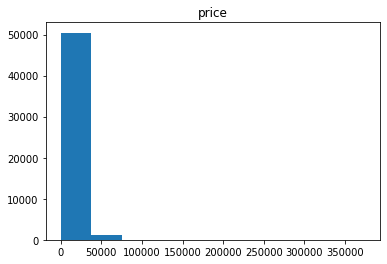

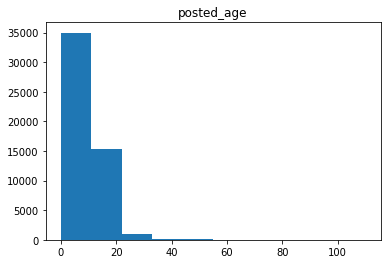

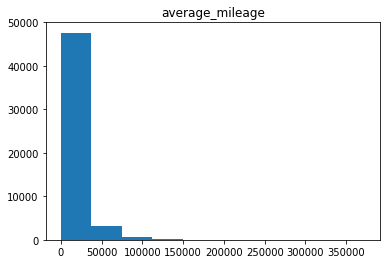

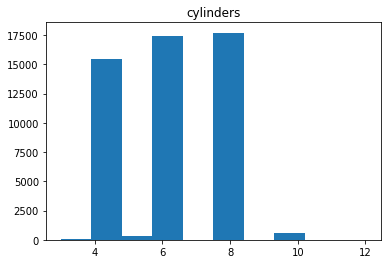

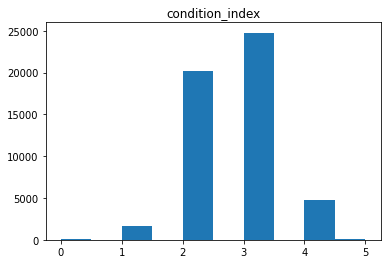

In [58]:
column_list=['price','posted_age','average_mileage','cylinders','condition_index']

for item in column_list:
    plt.figure()
    plt.hist(item,data=vehicles_data)
    plt.title(item)

The price, posted age and average mileage graphs are all skewed to the left. This could be as a result of outliers in the columns. We would need to examine these columns and filter out the outliers if found.

## Study and treat outliers <a class="anchor" id="section_1_7"></a>

We will check for outliers by finding the upper and lower limits and findind the values that exceed these values.

In [63]:
def upper_lower_limit(column, df):#creating a function that produces a filtered dataframe.

        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1

        lower_limit = q1 - 1.5 * IQR
        upper_limit = q3 + 1.5 * IQR

        #filter outliers
        df_filtered = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
        return df_filtered

# implement the loop statement that recursively filters values out.
new_vehicles_data = vehicles_data.copy()
for col in ['price', 'posted_age', 'average_mileage','cylinders','condition_index']:
    new_vehicles_data = upper_lower_limit(col, new_vehicles_data)# new_vehicles_data will be your new data without outliers
    
    
new_vehicles_data    

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,posted_age,average_mileage,condition_index
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,23,6,2018,7,20714.285714,2
1,25500,2011,ford f150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018,7,12672.142857,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,6,18333.333333,4
3,1500,2003,ford f150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,22,3,2019,16,11350.812500,1
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,20,6,2018,4,14488.500000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750,2015,honda accord,excellent,4,gas,104230.0,automatic,coupe,unknown,False,2018-11-24,89,24,11,2018,3,34743.333333,3
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,3,10,2018,5,17627.200000,4
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,15,11,2018,9,14222.222222,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2,7,2018,5,27914.600000,2


In [72]:
display(new_vehicles_data.describe(),vehicles_data.describe())

,price,model_year,cylinders,odometer,days_listed,day_posted,month_posted,year_posted,posted_age,average_mileage,condition_index
count,45630.000000,45630.000000,45630.000000,45630.000000,45630.000000,45630.000000,45630.000000,45630.000000,45630.000000,45630.000000,45630.000000
mean,10730.619198,2009.513215,6.075959,117543.785645,39.539886,15.438615,6.568639,2018.316941,8.803726,15638.086718,2.617686
std,7591.871397,4.944855,1.645583,58386.487912,28.232694,8.729359,3.487144,0.465289,4.946310,7637.349525,0.686267
min,1.000000,1994.000000,3.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,0.000000,0.000000,1.000000
25%,4995.000000,2006.000000,4.000000,80450.500000,19.000000,8.000000,3.000000,2018.000000,5.000000,10356.571429,2.000000
50%,8500.000000,2010.000000,6.000000,114443.000000,33.000000,15.000000,7.000000,2018.000000,8.000000,14461.969231,3.000000
75%,14995.000000,2013.000000,8.000000,150347.500000,53.000000,23.000000,10.000000,2019.000000,12.000000,20000.000000,3.000000
max,34595.000000,2019.000000,12.000000,710000.000000,271.000000,31.000000,12.000000,2019.000000,24.000000,38245.000000,4.000000


,price,model_year,cylinders,odometer,days_listed,day_posted,month_posted,year_posted,posted_age,average_mileage,condition_index
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.796448,6.121067,115199.014508,39.55476,15.449491,6.628491,2018.307462,8.511014,18937.905349,2.637535
std,10040.803015,6.099229,1.657457,60484.863376,28.20427,8.736521,3.474134,0.461447,6.112979,16270.531049,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.00000,1.000000,1.000000,2018.000000,0.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,19.00000,8.000000,3.000000,2018.000000,4.000000,10423.000000,2.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,33.00000,15.000000,7.000000,2018.000000,7.000000,14988.214286,3.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,53.00000,23.000000,10.000000,2019.000000,12.000000,21800.000000,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,31.000000,12.000000,2019.000000,110.000000,373200.000000,5.000000


The maximum value in the `price` column is 375000 however the upper limit is 34597.5 depicting the precence of outliers. The maximum value for the `posted_age` column is 110 and the upper limit is 24 depicting the presence of outliers. The maximum value of the `average_mileage` column is 373200 and the upper limit is 38245. This depicts the presence of outliers. The cylinder column does not have any outliers. The condition index may have some outliers but these are not too high. Outliers for each core parameter have been filtered out and a new dataframe has been created. We would use this new dataframe to study the data and determine which of the core parameters affects the price of a car.

## Study core parameters without outliers <a class="anchor" id="section_1_8"></a>

Using the filtered data to make new plots, then compare with the earlier ones (that included outliers) and draw conclusions for each.

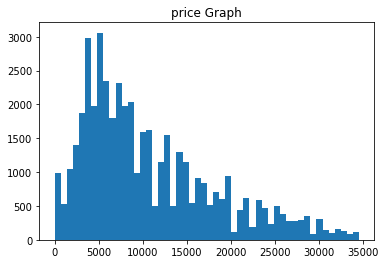

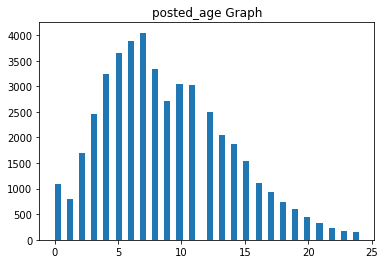

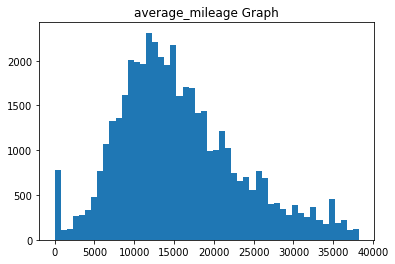

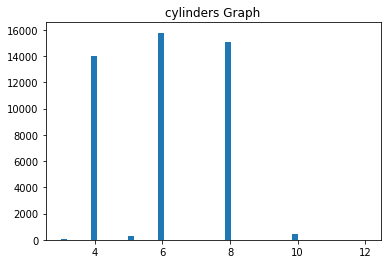

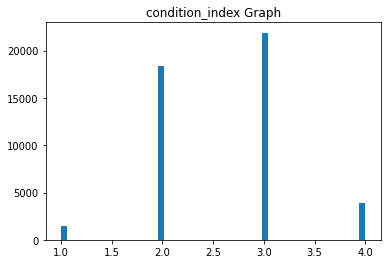

In [73]:
column_list=['price','posted_age','average_mileage','cylinders','condition_index']

for item in column_list:
    plt.figure()
    plt.hist(item,data=new_vehicles_data,bins=50)
    plt.title(f'{item} Graph')

after removing the outliers we noticed that the price was majorly around 3000 to around 5000. The posted age had its highes peak at around 4000 and average mileage had a normal distribution peaking at around almost 2500. The cylinders columns did not have any outliers but the highest number of cylinders was around 5 cylinders and condition index had majority of the cars being of excellent condition.

## Ads lifetime <a class="anchor" id="section_1_9"></a>
 
Studying how many days advertisements were displayed (`days_listed`) by calculating the mean and median then describe the typical lifetime of an ad. This would help determine when ads were removed quickly, and when they were listed for an abnormally long time.

In [74]:
display(new_vehicles_data['days_listed'].describe())

count    45630.000000
mean        39.539886
std         28.232694
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

<AxesSubplot:>

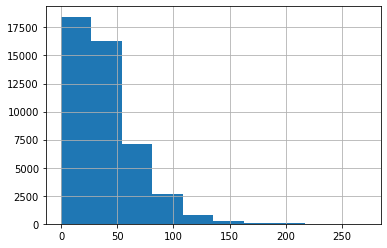

In [75]:
new_vehicles_data['days_listed'].hist()

<AxesSubplot:>

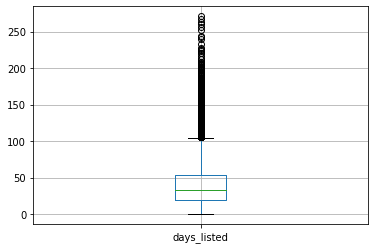

In [76]:
new_vehicles_data.boxplot(column='days_listed')

In [84]:
#calculating the median, mean and general information on the days listed column

display(new_vehicles_data['days_listed'].mean(),new_vehicles_data['days_listed'].median(),new_vehicles_data['days_listed'].describe())

39.53988603988604

33.0

count    45630.000000
mean        39.539886
std         28.232694
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Abnormal long days are days which are above the 75th percentile(53days), abnormal short days are days which are below the 25th percentile(19days). A normal day can be days which are equal to the median(33days). The days listed column has outliers which are skewing the data. The maximum value for the days listed column is 271 and the minimum value is 0. lower limit is -32 and the upper limit is 104. This further proves that there are outliers. Most of these cars listed were either of excellent, good and like new condition. This could explain why they did not stay long listed. They must have been bought as soon as they were listed. most of these cars listed were either of excellent, good and like new condition. This could explain why they did not stay long listed. They must have been bought as soon as they were listed. Only one car was listed for the maximum number of days. This car could have had issues that the buyers did not want to buy the car.

## Average price per each type of vehicle <a class="anchor" id="section_1_10"></a>

Analyzing the number of ads and the average price for each type of vehicle then plot a graph showing the dependence of the number of ads on the vehicle type. 

In [85]:
vehicle_type_mean=new_vehicles_data.pivot_table(index='type',values='price',aggfunc=['count','mean']).reset_index()
vehicle_type_mean.columns=['type','type_count','mean_price']
vehicle_type_mean.sort_values('type_count',inplace=True)
vehicle_type_mean

,type,type_count,mean_price
1,bus,23,17445.913043
6,offroad,180,13913.983333
7,other,220,9864.859091
2,convertible,340,12715.738235
11,van,543,8272.917127
4,hatchback,949,6523.825079
5,mini-van,1070,7544.014953
12,wagon,1466,8662.673261
3,coupe,1916,12820.331420
8,pickup,6002,14265.208764


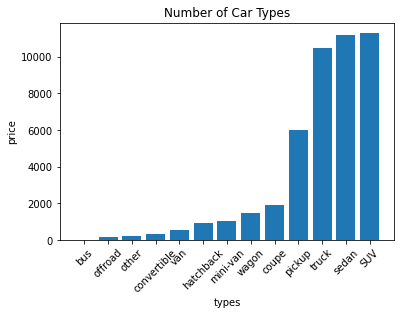

In [91]:
plt.bar('type','type_count',data=vehicle_type_mean)
plt.xticks(rotation=45)
plt.title('Number of Car Types')
plt.xlabel('types')
plt.ylabel('price')
plt.show()

the 2 car types that have the highest number of ads are sedans(11204) and SUV(11317) 

## Price factors <a class="anchor" id="section_1_11"></a>

We will be taking the top two of the popular types detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), we will plot box-and-whisker charts, and creating scatterplots for the rest. This is to determine which factors affect price.

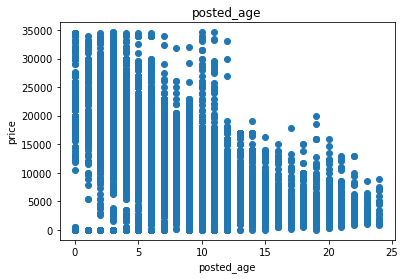

In [90]:
#creating a scatter_plot to determine the relationship between price and posted age for SUV
SUV_data=new_vehicles_data.query('type=="SUV"')

plt.scatter(x='posted_age' ,y='price', data=SUV_data)
plt.title('posted_age')
plt.xlabel('posted_age')
plt.ylabel('price');


In [159]:
SUV_data[['price','posted_age']].corr()

,price,posted_age
price,1.000000,-0.566634
posted_age,-0.566634,1.000000


The age posted of the vehicle is negatively correlated to the price. The higher the price, the longer the shorter the car stayed on the platform.

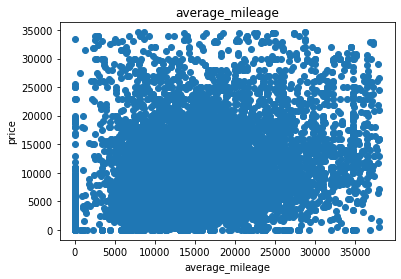

In [89]:
#creating a scatter_plot to determine the relationship between average mileage and price of SUV
plt.scatter(x='average_mileage' ,y='price', data=SUV_data)
plt.title('average_mileage')
plt.xlabel('average_mileage')
plt.ylabel('price');



In [161]:
SUV_data[['price','average_mileage']].corr()

,price,average_mileage
price,1.000000,0.257756
average_mileage,0.257756,1.000000


The average mileage per year and the price have very low positive correlation. This proves the mileage has a small effect on the price of the SUV

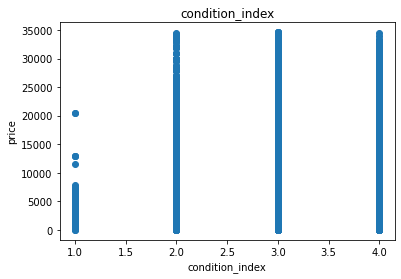

In [88]:
#creating a scatter_plot to determine the relationship between condition index and price of SUV
plt.scatter(x='condition_index' ,y='price', data=SUV_data)
plt.title('condition_index')
plt.xlabel('condition_index')
plt.ylabel('price');



In [165]:
SUV_data[['price','condition_index']].corr()

,price,condition_index
price,1.000000,0.268988
condition_index,0.268988,1.000000


The price and condition of the car have a correlation coeffecient of 0.27. This means that they have a low positive correlation,Thus condition has a small effect on the price of the car.

We will now check the transmission and paint color categories to confirm if each category is greater than 50.

In [179]:
#checking the transmission categories
SUV_data['transmission'].value_counts()

automatic    10717
manual         460
other          140
Name: transmission, dtype: int64

All transmission categories are above 50 so we will use all.

In [180]:
#checking the paint_color categories
SUV_data['paint_color'].value_counts()

unknown    2025
black      1972
white      1750
silver     1463
grey       1076
blue        968
red         847
green       418
brown       354
custom      290
orange       73
yellow       43
purple       38
Name: paint_color, dtype: int64

yellow and purple colors have instances below 50, we will filter them all out and use the filtered dataframe to analyse the data.

In [181]:
#filtering the SUV data
new_suv_data=SUV_data.query('paint_color != "yellow" & paint_color != "purple"')

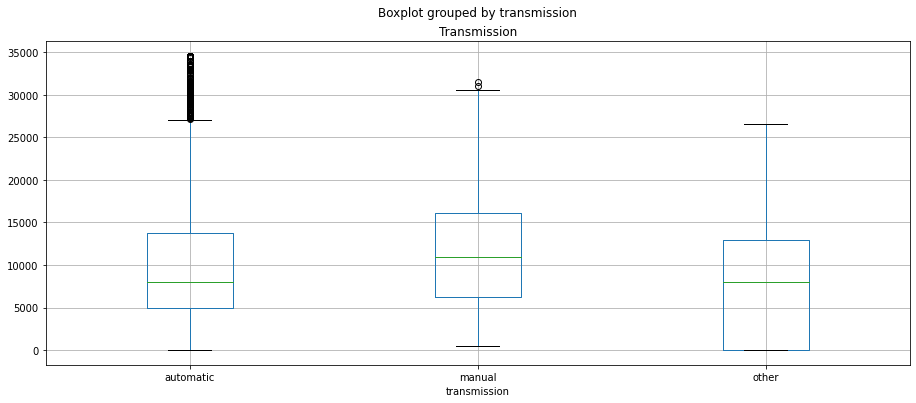

In [182]:
#creating a scatter_plot to determine the relationship between transmission type and price of SUV

new_suv_data.boxplot(column='price',by='transmission',figsize=(15,6))
plt.title('Transmission');


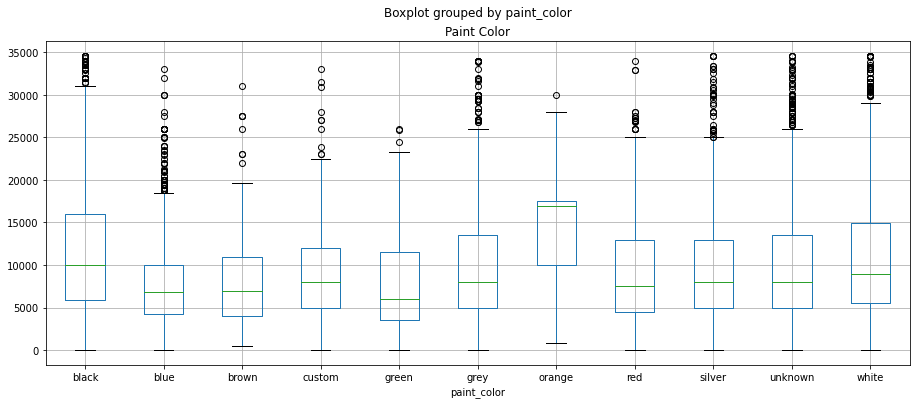

In [176]:
#creating a scatter_plot to determine the relationship between color type and price of SUV
new_suv_data.boxplot(column='price',by='paint_color',figsize=(15,6))
plt.title('Paint Color');



Transmission and paint_color were categorical in nature, so we had to use boxplots to explain the data. The manual cars had the highest median and were more widespread than the other and automatic transmissions. However the difference between the manual and automatic cars was that the automatic cars had more outliers and had the highest price recorded.

For paint_color, Orange cars hasd the highest median and the least number of outliers. black cars had the cars with the highest price and had the highest upper limit.

## General Conclusion <a class="anchor" id="section_1_12"></a>

The initial vehicle_data had a total of 51525 rows and 12 columns. There were a few rows that needed to be cleaned in terms of missing values,ie, `model_year`, `cylinders`,`odometer`,`paint_color` and `is_4wd`. In terms of outliers, we noticed that the `price` column had alot of them off the bat, but we needed to study the rest to see if the other columns had outliers. The median was way lower than the mean by over 3000. The date_posted column was saved as an object but should have been in date format.

We replaced the missing values for the rows that we would use and corrected all the data types to the appropriates ones. These would be `model_year`,`odometer`,`model`,`condition`,`fuel,type`,`is_4wd`,`date_posted`,`cylinders` and `days_listed`. We also removed the outliers to prevent them from skewing the data from the `price`, `posted_age`, `average_mileage`, `condition_index`. 

We then perfomed the analysis on the data and compared all the factors that we thought might affect the price of a vehicle. We found the vehicles with the highest count which were SUV and sedan. From the correlation coefficient and the correlation plots, we gathered that `posted age` had the highest negative correlation with price of -0.57. Higher priced vehicles stayed shorter on the platform that the lower priced vehicles. `average_mileage` and `condition_index` had low positive correlation with the `price` of the car of 0.26 and 0.27 respectively. This means that a slight increase in the `average_mileage` and `condtion`, the higher the price, however by a small margin.

`Transmission` and `paint_color` were categorical in nature, so we had to use boxplots to explain the data. The manual cars had the highest median and were more widespread than the other and automatic transmissions. However the difference between the manual and automatic cars was that the automatic cars had more outliers and had the highest price recorded.

For `paint_color`, Orange cars hasd the highest median and the least number of outliers. black cars had the cars with the highest price and had the highest upper limit.

We can say that the age posted, average mileage and condition have effects on the price of the car. Although the age posted had the highest neagtive relationship.